# NLP Pipeline
We will learn some basic operations of the NLP pipelines with the help of two libraries, NLTK and spaCy. These will prove useful in your project for tasks such as preprocessing.

In [3]:
%pip install -q nltk matplotlib

Note: you may need to restart the kernel to use updated packages.


## NLTK
We will use [Chapter 3 of the introductory manual of NLTK](https://www.nltk.org/book/ch03.html) to solve the following exercises.

First, use the interactive downloader to get the *gutenberg* book corpus (in the *Corpora* tab). Take a moment to admire the amazing user interface.

In [4]:
import nltk
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

NLTK automatically saves its files in the `nltk_data` folder in your home directory. (Windows users: Maybe it's in your `Documents`?)

We load the raw text of the first book in the corpus.

In [5]:
from nltk.corpus import gutenberg
raw_text = gutenberg.raw('austen-emma.txt')
print(len(raw_text))
print(raw_text[:200])

887071
[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; an


To use nltk's tokenization, we need to download the `punkt_tab` resource.

In [6]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\fabia\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

Count the number of words and sentences in the book.

In [7]:
print(len(nltk.word_tokenize(raw_text)))
print(len(raw_text.split()))
print(len(nltk.sent_tokenize(raw_text)))

191855
158167
7493


- Lowercase all words. 
- Count the number of unique lower-cased words in the book.

In [8]:
raw_text = raw_text.lower()
words = nltk.word_tokenize(raw_text)

print(f"Tokens: {len(words)}")
print(f"Types: {len(set(words))}")

Tokens: 191851
Types: 7914


The total number of words is also called *tokens*, and the unique words are the *types*. (This is the same distinction as instance vs. class in software engineering.)

We now perform *stemming* on the first 50 words of the text. We use the PorterStemmer (example usage [here](https://www.nltk.org/howto/stem.html)). Plot only the pairs of words that have changed after stemming.

In [9]:
stemmer = nltk.stem.porter.PorterStemmer()
stemmed_words = [stemmer.stem(w) for w in words[:50]]
for w_orig, w_stem in zip(words[:50], stemmed_words):
    if w_orig != w_stem:
        print(w_orig, w_stem)

volume volum
woodhouse woodhous
handsome handsom
comfortable comfort
happy happi
disposition disposit
seemed seem
unite unit
blessings bless
existence exist
lived live
nearly nearli
twenty-one twenty-on
years year


Find the 10 most frequent words, together with their counts, using the `FreqDist` object from NLTK. Save it to a variable named `fdist`.

In [10]:
fdist = nltk.FreqDist(words)

for word, count in fdist.most_common(10):
    print(word, count)
    
print([(word, count) for word, count in fdist.most_common(50) if len(word) >= 5])

, 12016
. 6351
the 5201
to 5181
and 4877
of 4284
i 3177
a 3124
-- 3100
it 2503
[('could', 836), ('would', 818)]


Run the below command to see the word counts vs. the words in the frequency distribution.

<AxesSubplot: xlabel='Samples', ylabel='Counts'>

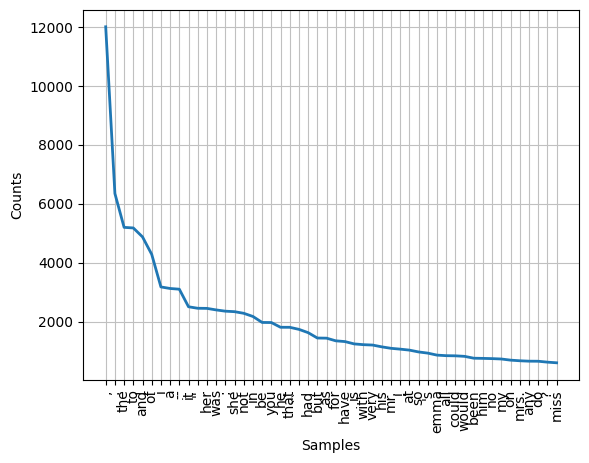

In [11]:
fdist.plot(50)

This curve is characteristic of any natural (= human) language, and is known as [Zipf's law](https://en.wikipedia.org/wiki/Zipf%27s_law). It states that the frequency of a word is inversely proportional to its rank, i.e.:
$$\text{frequency}(x) \propto \frac{1}{\text{rank}(x)}$$

## Hugging Face

With Transformers (we will get to know them in more detail later in the course), tokenization has become part of the model itself. As opposed to `word_tokenize` in NLTK, Transformers use BPE tokenization.

We first install Hugging Face's `transformers` library.

In [1]:
%pip install -q transformers ipywidgets

Note: you may need to restart the kernel to use updated packages.


Use the [model page of the base-uncased version of BERT](https://huggingface.co/google-bert/bert-base-uncased) to initialize a `BertTokenizer`.

In [13]:
# from transformers import BertTokenizer
# tokenizer = BertTokenizer.from_pretrained('google-bert/bert-base-uncased')

from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')

We look at the first sentence of Jane Austen's Emma.

In [14]:
sentence = nltk.sent_tokenize(raw_text)[0].split('\n\n\n')[-1].replace('\n', ' ')
print(sentence)

emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.


Encode the sentence. Look at the outputs of the following functions:
- `tokenizer(sentence)`
- `tokenizer.encode(sentence)`
- `tokenizer.tokenize(sentence)`
- `tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))`

In [15]:
tokenizer.convert_tokens_to_ids(tokenizer.tokenize(sentence))

[5616,
 3536,
 4580,
 1010,
 8502,
 1010,
 12266,
 1010,
 1998,
 4138,
 1010,
 2007,
 1037,
 6625,
 2188,
 1998,
 3407,
 22137,
 1010,
 2790,
 2000,
 15908,
 2070,
 1997,
 1996,
 2190,
 24618,
 1997,
 4598,
 1025,
 1998,
 2018,
 2973,
 3053,
 3174,
 1011,
 2028,
 2086,
 1999,
 1996,
 2088,
 2007,
 2200,
 2210,
 2000,
 12893,
 2030,
 2310,
 2595,
 2014,
 1012]

**Decoding.** Check out the various ways of decoding: `.decode`, `.convert_ids_to_tokens`, `.convert_tokens_to_string`.

In [16]:
input_ids = tokenizer.encode(sentence)
print(tokenizer.decode(input_ids, skip_special_tokens=True, remove_tokenization_spaces=True))
print(tokenizer.convert_ids_to_tokens(input_ids))
print(tokenizer.convert_tokens_to_string(tokenizer.convert_ids_to_tokens(input_ids)))

emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her.
['[CLS]', 'emma', 'wood', '##house', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a', 'comfortable', 'home', 'and', 'happy', 'disposition', ',', 'seemed', 'to', 'unite', 'some', 'of', 'the', 'best', 'blessings', 'of', 'existence', ';', 'and', 'had', 'lived', 'nearly', 'twenty', '-', 'one', 'years', 'in', 'the', 'world', 'with', 'very', 'little', 'to', 'distress', 'or', 've', '##x', 'her', '.', '[SEP]']
[CLS] emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her. [SEP]


**Tokenization differences.** Compare the tokenization of NLTK, bert-base-uncased and [t5-small](https://huggingface.co/google-t5/t5-small).

In [17]:
t5_tokenizer = AutoTokenizer.from_pretrained('google-t5/t5-small')

Now `encode` and `decode` the sentence with all 3 tokenizers. Is the encoding/decoding lossless, i.e. do we recover the original sentence?

In [26]:
nltk_enc = nltk.word_tokenize(sentence)
nltk_dec = ' '.join(nltk_enc)
print(nltk_dec)

print(tokenizer.decode(tokenizer.encode(sentence), skip_special_tokens=True))

print(t5_tokenizer.decode(t5_tokenizer.encode(sentence), skip_special_tokens=True))

emma woodhouse , handsome , clever , and rich , with a comfortable home and happy disposition , seemed to unite some of the best blessings of existence ; and had lived nearly twenty-one years in the world with very little to distress or vex her .
emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence ; and had lived nearly twenty - one years in the world with very little to distress or vex her.
emma woodhouse, handsome, clever, and rich, with a comfortable home and happy disposition, seemed to unite some of the best blessings of existence; and had lived nearly twenty-one years in the world with very little to distress or vex her.


## spaCy
We will use the [spaCy 101 guide](https://spacy.io/usage/spacy-101) to familiarize ourselves with its capabilities. First we install and download the small core model for English.

In [23]:
import os
os.environ["TOKENIZERS_PARALLELISM"] = "false"

%pip install setuptools wheel
%pip install spacy
!python -m spacy download en_core_web_sm

Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.12.2 which is incompatible.



  Using cached murmurhash-1.0.12-cp310-cp310-win_amd64.whl.metadata (2.2 kB)
  Using cached cymem-2.0.11-cp310-cp310-win_amd64.whl.metadata (8.8 kB)
  Using cached typing_extensions-4.12.2-py3-none-any.whl.metadata (3.0 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
   ---------------------------------------- 12.2/12.2 MB 2.9 MB/s eta 0:00:00
Using cached cymem-2.0.11-cp310-cp310-win_amd64.whl (39 kB)
Using cached murmurhash-1.0.12-cp310-cp310-win_amd64.whl (25 kB)
   ---------------------------------------- 2.0/2.0 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 632.3/632.3 kB 3.4 MB/s eta 0:00:00
   ---------------------------------------- 1.5/1.5 MB 3.7 MB/s eta 0:00:00
   ---------------------------------------- 6.2/6.2 MB 3.9 MB/s eta 0:00:00
Using cached colorama-0.4.6-py2.py3-none-any.whl (25 kB)
   ---------------------------------------- 5.4/5.4 MB 4.8 MB/s eta 0:00:00
Using cached typing_extensions-4.12.2-py3-none-any.whl (37 kB)


*(You may have to restart your kernel after installing spacy.)*

We can now load the NLP pipeline from the small model.

In [2]:
import spacy
pipeline = spacy.load('en_core_web_sm')
doc = pipeline('Apple is looking at buying U.K. startup for $1 billion.')

The `doc` object has now tokenized our sentence and ran the NLP pipeline on it, as shown in this image:
![spacy pipeline](https://spacy.io/images/pipeline.svg)

Use the 101 guide to display the following information about each token.
- Text: The original word text.
- Lemma: The base form of the word.
- POS: The simple [UPOS](https://universaldependencies.org/u/pos/) part-of-speech tag.
- Tag: The detailed part-of-speech tag.
- Dep: Syntactic dependency, i.e. the relation between tokens.
- Shape: The word shape – capitalization, punctuation, digits.
- is stopword: Is the token part of a stop list, i.e. the most common words of the language?

In [ ]:
for token in doc:
    print(token.text, token.lemma_, token.pos_, token.tag_, token.dep_, token.shape_, token.is_stop)

Apple Apple PROPN NNP nsubj Xxxxx False
is be AUX VBZ aux xx True
looking look VERB VBG ROOT xxxx False
at at ADP IN prep xx True
buying buy VERB VBG pcomp xxxx False
U.K. U.K. PROPN NNP nsubj X.X. False
startup startup VERB VBD ccomp xxxx False
for for ADP IN prep xxx True
$ $ SYM $ quantmod $ False
1 1 NUM CD compound d False
billion billion NUM CD pobj xxxx False
. . PUNCT . punct . False


Looking at the named entities in `doc`, print the following information:
- The token's text
- The start index of the named entity
- Its end index
- The NER label

In [6]:
for ent in doc.ents:
    print(ent.text, ent.start_char, ent.end_char, ent.label_)

Apple 0 5 ORG
U.K. 27 31 GPE
$1 billion 44 54 MONEY


**Question:** Search the internet for a description of the entity labels `FAC`, `ORG`, `GPE` and `LOC`.

**Answer:** 

FAC: Refers to facilities such as buildings, airports, highways, bridges, and other man-made structures.

ORG: Denotes organizations, including companies, agencies, institutions, and other groups with a formal organizational structure.

GPE: Stands for Geopolitical Entities, encompassing countries, cities, states, and regions defined by political boundaries.

LOC: Represents locations that are not geopolitical entities, such as mountain ranges, bodies of water, and other natural geographic features.